In [50]:
#import libs 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn_features.transformers import DataFrameSelector
## -  - metrics
from sklearn.metrics import mean_squared_error , r2_score
##------ model
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from xgboost import XGBRegressor
plt.style.use("bmh")
%matplotlib inline


##### `Load the Dataset and Look at the big Picture`

In [51]:
#read data 
import os
FILE_PATH = os.path.join(os.getcwd(), 'housing.csv')
data = pd.read_csv(FILE_PATH)
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [52]:
#check some information about the dataset to (count , nulls , datatypes)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [53]:
#see some statistics about data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [54]:
#show the dimension about dataset
data.shape

(20640, 10)

In [55]:
#show the number of the null values in data 
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Exploratory Data Analysis

In [56]:
# show the skew the numerical data 
numerical_coulmns=[]
data_columns=data.columns
for col in data_columns:
    if data[col].dtype=='float64':
        numerical_coulmns.append(col) 
data[numerical_coulmns].skew()  

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

C:\Users\galal\AppData\Local\Temp\ipykernel_652\3791855008.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\galal\AppData\Local\Temp\ipykernel_652\3791855008.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\galal\AppData\Local\Temp\ipykernel_652\3791

C:\Users\galal\AppData\Local\Temp\ipykernel_652\3791855008.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\galal\AppData\Local\Temp\ipykernel_652\3791855008.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\galal\AppData\Local\Temp\ipykernel_652\3791

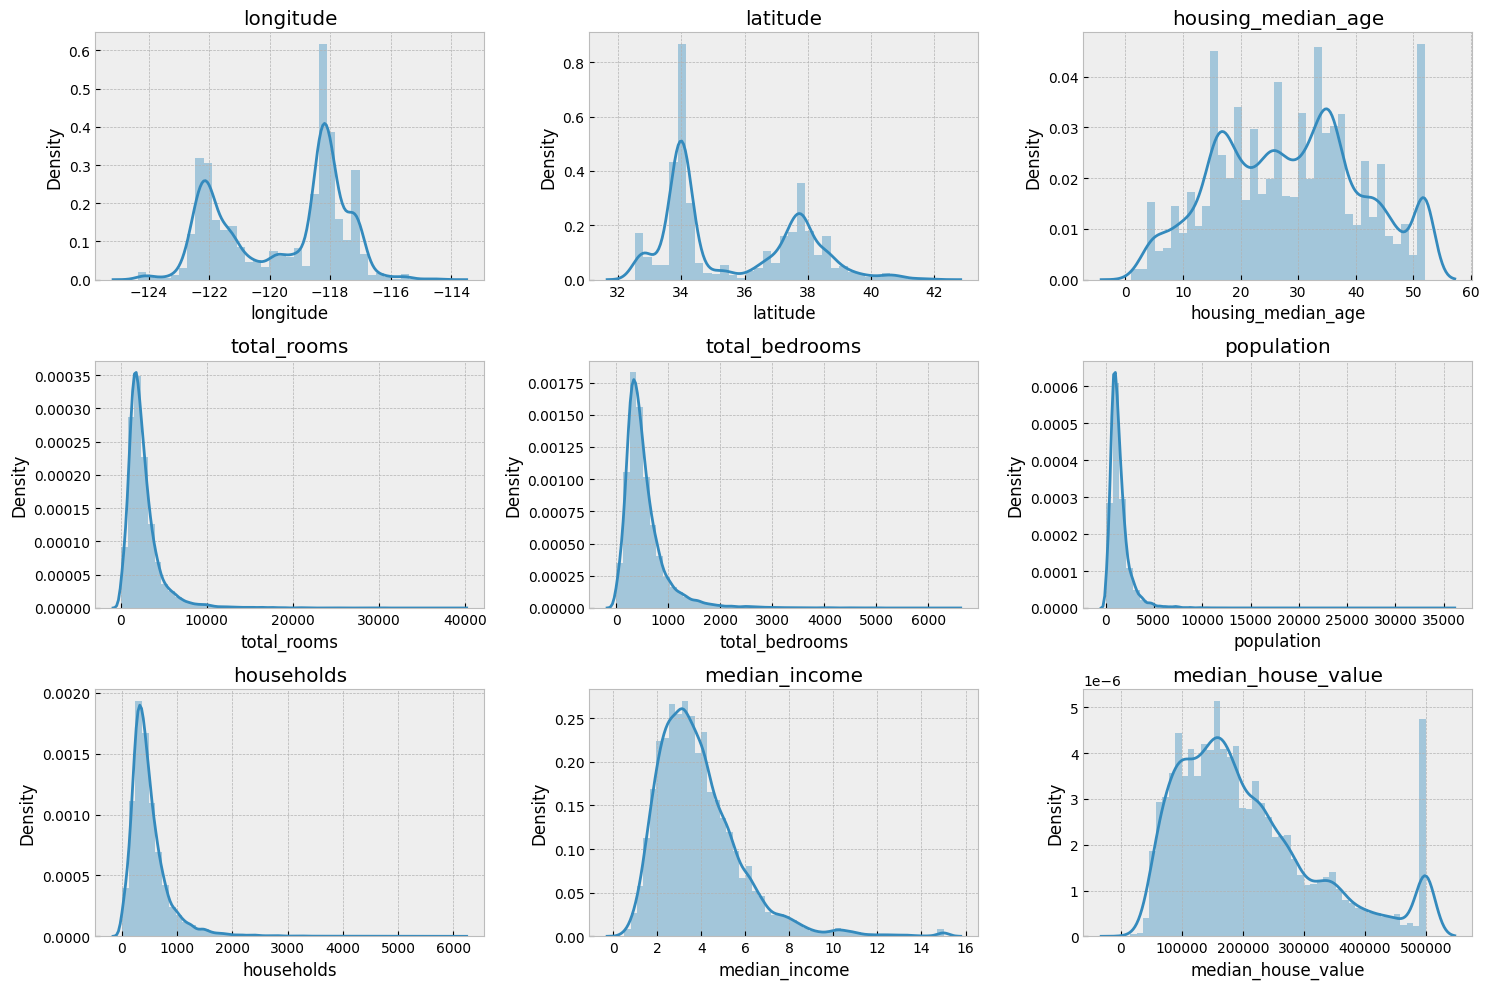

In [57]:
#show the distribution for each numerical column
i = 0
plt.figure(figsize=(15, 10))
for col in numerical_coulmns:  # Assuming numerical_columns is a list containing the names of numerical columns in your dataset
    i += 1
    plt.subplot(3, 3, i)  # This creates a grid of 3x3 plots; adjust the numbers based on the number of columns you have
    sns.distplot(data[col])
    plt.title(col)
plt.tight_layout()  # This ensures that the plots are properly laid out in the figure
plt.show()


notices:
1.  the columns ['longitude','latitude','housing_median_age'] tends to normal distribution 
2.  the another columns right skwe

In [58]:
#describe house age coulmn and analysis 
data['housing_median_age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

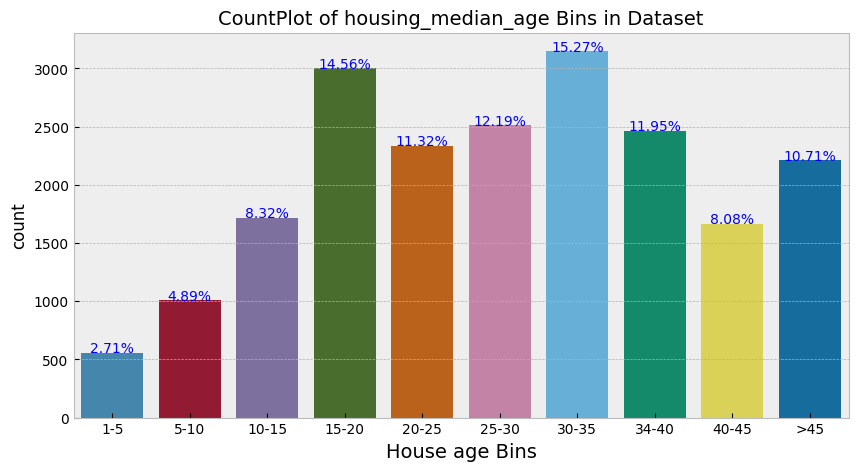

In [59]:
#anslysis 'housing_median_age'  column 
## Try for (housing_median_age) to convert it into chunks (bins)

house_median_bins=pd.cut(x=data['housing_median_age'],bins=[-np.inf,5,10,15,20,25,30,35,40,45,np.inf],
                         labels=['1-5','5-10','10-15','15-20','20-25','25-30','30-35','34-40','40-45','>45'])
plt.figure(figsize=(10,5))
sns.countplot(x=house_median_bins)
plt.title('CountPlot of housing_median_age Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House age Bins', fontsize=14, c='k')

len_of_intervals=10
len_interval1,len_interval2=len(data[(data['housing_median_age'] >= 1) & (data['housing_median_age'] <= 5)]),len(data[(data['housing_median_age'] > 5) & (data['housing_median_age'] <= 10)])
len_interval3,len_interval4=len(data[(data['housing_median_age'] > 10) & (data['housing_median_age'] <= 15)]),len(data[(data['housing_median_age'] > 15) & (data['housing_median_age'] <= 20)])
len_interval5,len_interval6=len(data[(data['housing_median_age'] > 20) & (data['housing_median_age'] <= 25)]),len(data[(data['housing_median_age'] > 25) & (data['housing_median_age'] <= 30)])
len_interval7,len_interval8=len(data[(data['housing_median_age'] > 30) & (data['housing_median_age'] <= 35)]),len(data[(data['housing_median_age'] > 35) & (data['housing_median_age'] <= 40)])
len_interval9,len_interval10=len(data[(data['housing_median_age'] > 40) & (data['housing_median_age'] <= 45)]),len(data[(data['housing_median_age'] > 45) & (data['housing_median_age'] <= 53)])
intervals=[len_interval1,len_interval2,len_interval3,len_interval4,len_interval5,len_interval6,len_interval7,len_interval8,len_interval9,len_interval10]
for col in range(len_of_intervals):
    value=intervals[col]
    text=f'{((100*value)/len(data)):0.2f}%'
    plt.text(x=col,y=value,s=text,c='b',fontsize=10,ha='center')

##### notic :  most of the houses are more than 10 years old

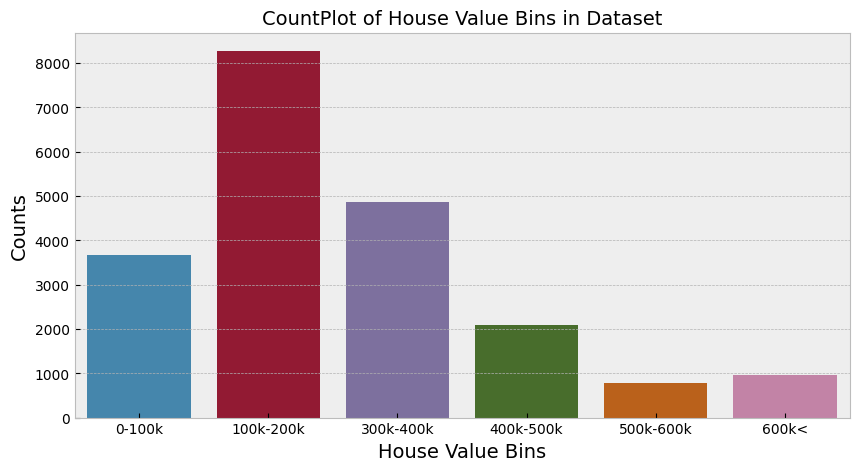

In [60]:
## Try for (median_house_value) to convert it into chunks (bins)
## Cut this Numerical Feature to Categorical One 
## Ex: for the following example -- any value between range (0-100k) will be the same category (like histogram)

house_value_bins = pd.cut(x=data['median_house_value'], 
                          bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf],
                          labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])


## Countplot for the above chunks
plt.figure(figsize=(10, 5))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

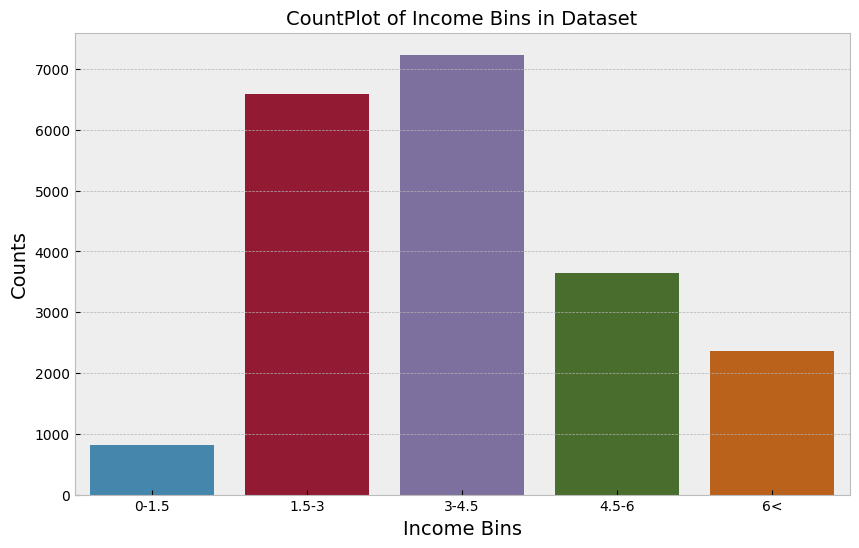

In [61]:
## Let's try the same above code for (median_income), I think it is very important Feature
income_bins = pd.cut(x=data['median_income'], 
                     bins=[-np.inf, 1.5, 3, 4.5, 6, np.inf], 
                     labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])


## Countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=income_bins)
plt.title('CountPlot of Income Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Income Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show() 

categories of (ocean_proximity) --- 
 ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
********************************************************************************


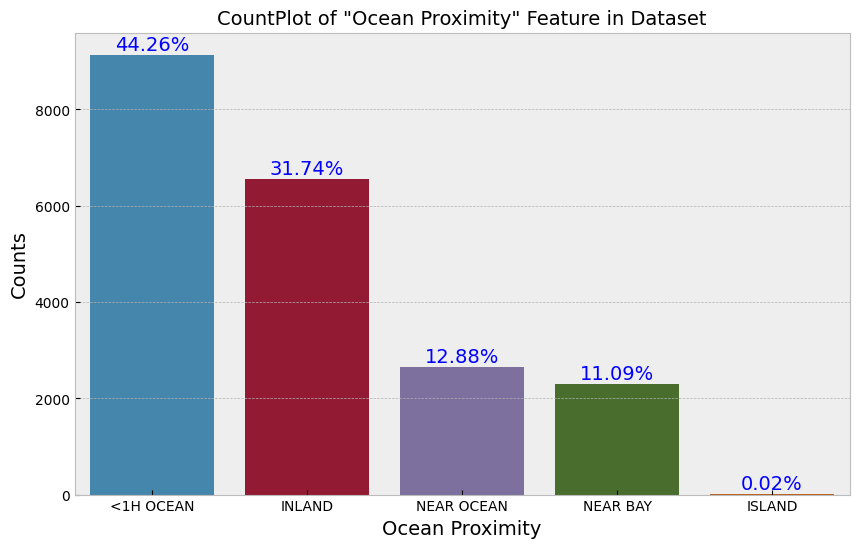

In [62]:
### Check the Distribution of (ocean_proximity) Feature in Dataset
ocean_values = data['ocean_proximity'].value_counts()
print('categories of (ocean_proximity) --- \n', ocean_values)
print('**'*40)


## Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=data, order=ocean_values.index)
plt.title('CountPlot of "Ocean Proximity" Feature in Dataset', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

## To show the percentage of each bar
for i in range(len(ocean_values)):  ## loop over the numbers of categories (number of bars)
    each_count = ocean_values.values[i]
    each_text = f'{((100*each_count)/ len(data)):.2f}%'
    plt.text(x=i, y=each_count+100, s=each_text, c='b', fontsize=14, ha='center')

In [63]:
## Replace the  (<1H OCEAN) to (1H OCEAN) -- will cause ane errors in Deploymnet
data['ocean_proximity'].replace('<1H OCEAN','1H OCEAN',inplace=True)

notics:
1. most houses are over 10 years old
2.  It seems that the (<1H ocean) is about the half of the dataset the data is biased to this category
3. Also the majority of house_value is between (100k-200k), Also the majority of median_income is between (3-4.5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

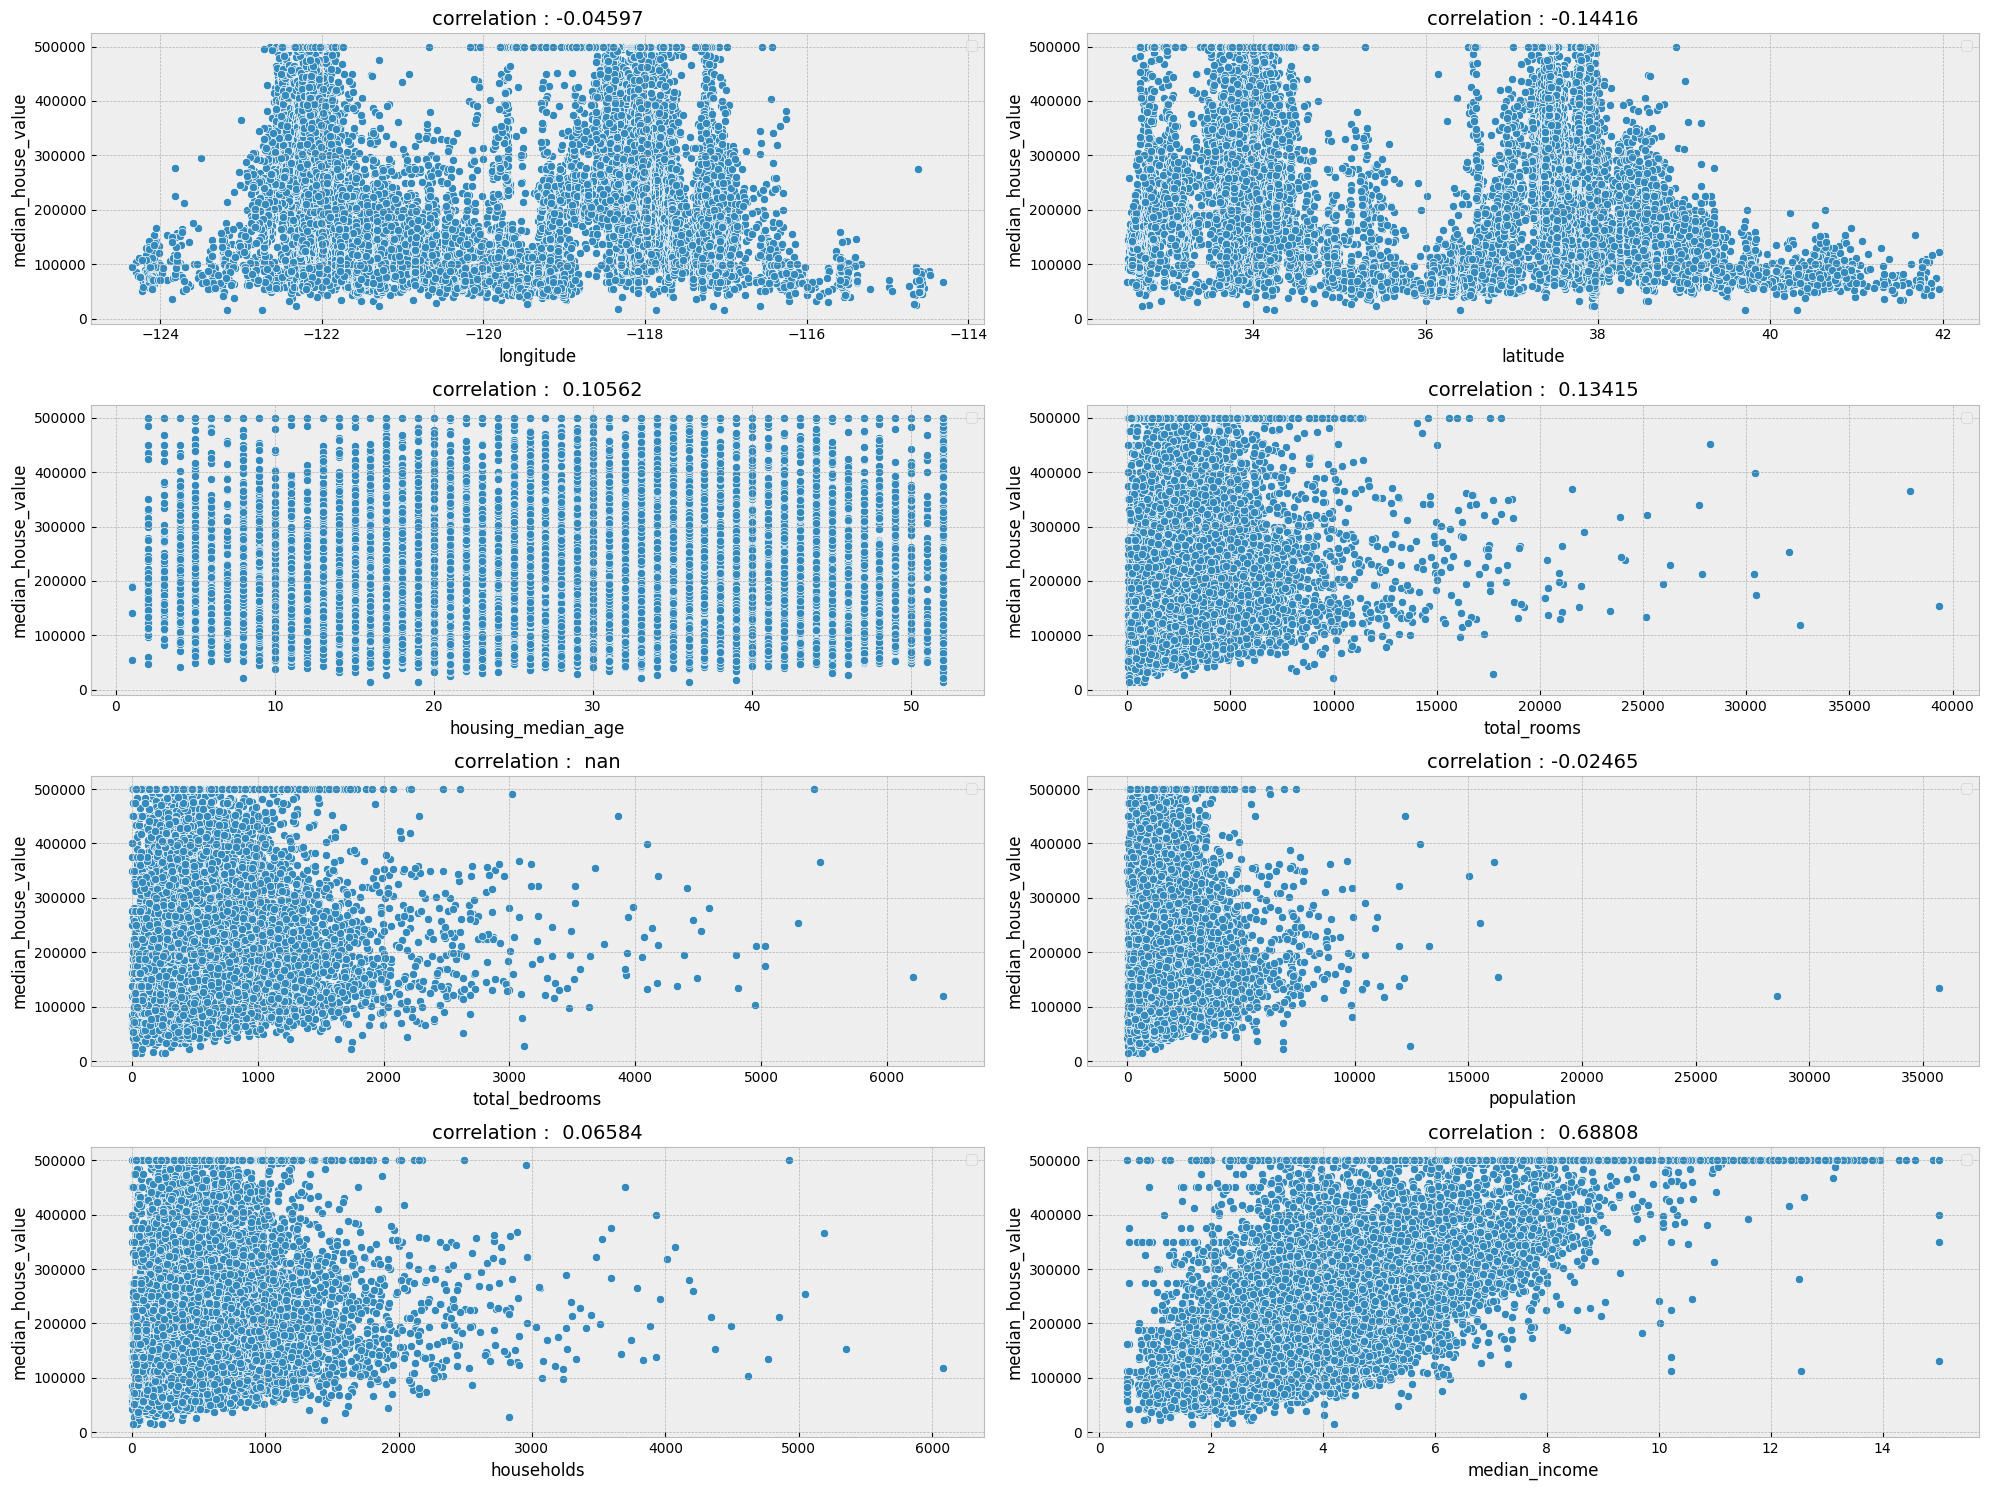

In [64]:

cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

plt.figure(figsize=(20, 15))  # Create the main figure outside the loop
i = 0

for col in cols:
    corr_p=np.corrcoef(data[col],data['median_house_value'])[0,1]
    i = i + 1
    plt.subplot(4, 2, i)  # Define the correct number of rows and columns
    sns.scatterplot(data=data, x=data[col], y=data['median_house_value'])
    plt.title(f'correlation : {corr_p : 0.5f}',c='k',fontsize=14)
    plt.legend()
plt.tight_layout()  # To improve spacing between subplots
plt.show()


c:\Users\galal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


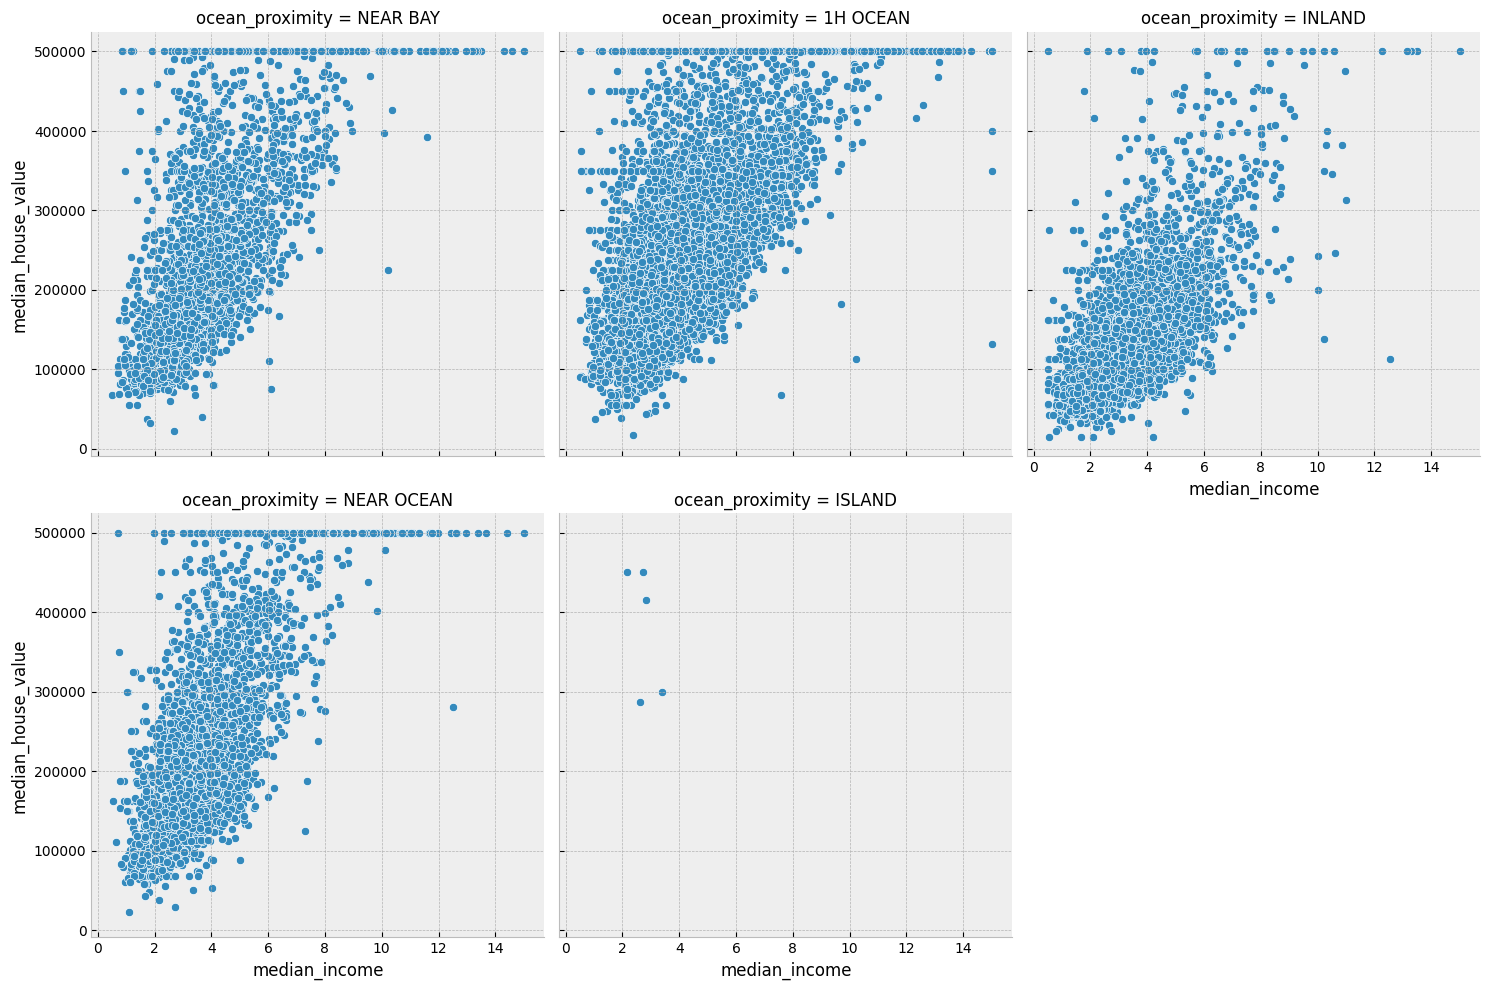

In [65]:
## Scatterplot with (median_income) & (median_house_value) at each (ocean_proximity)
sns.relplot(x='median_income', y='median_house_value', data=data, kind='scatter', 
            col='ocean_proximity', col_wrap=3)
plt.show()

* > `Comment: It seems that the Distribution of median_income is almost the same at ocean_proximity categories, Also, it seems that the INLAND median_income and median_house value is less than other categories and it makes sense ` 

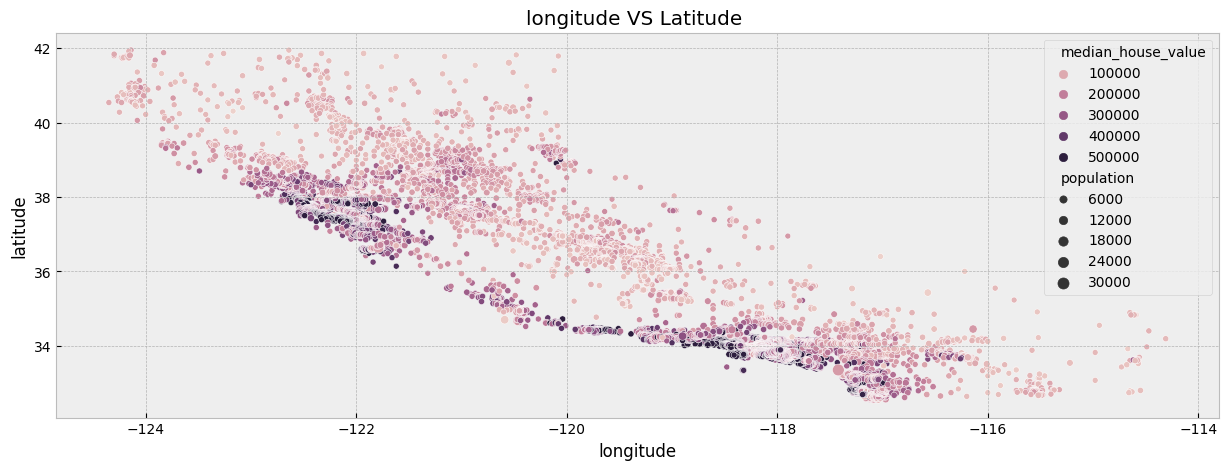

In [66]:
## ScatterPlot for (longitude & Latitude), and add (population) as size of point, and the color as (median_house_value)
plt.figure(figsize=(15,5))
sns.scatterplot(data=data, x='longitude', y='latitude', size='population', hue='median_house_value')
plt.title('longitude VS Latitude ')
plt.show()
from IPython.display import Image
  
# get the image
Image(url="Capture.PNG", width=500, height=300)

##### from the photo and plot we notice :  Houses near the sea are more expensive


<Axes: >

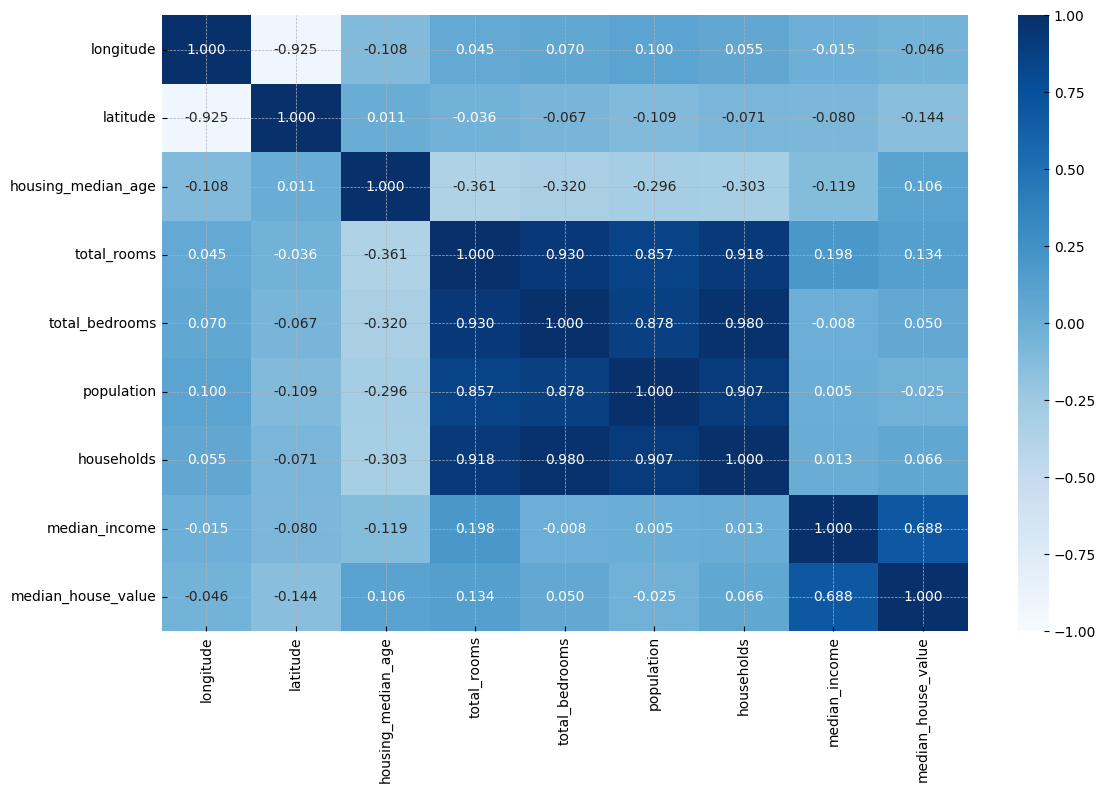

In [67]:
## you can show this as heatmap
corr_data=data.drop('ocean_proximity',axis=1)
corr=corr_data.corr()
plt.figure(figsize=(13,8))
sns.heatmap(corr,annot=True,vmax=1,vmin=-1,fmt='0.3f',cmap='Blues')

In [68]:
# display the correlation between the columns and target column 
corr_house_value=corr['median_house_value'].sort_values(ascending=False)
correlation_house_value=pd.DataFrame(data=corr_house_value.values,index=corr_house_value.index,columns=['correlation'])
correlation_house_value.style.background_gradient(cmap='Reds')

,correlation
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


* > `Comment: It seems that the most correlated Feature with target is (median_income) as I predict that, and feature like (households & population) are less correlated` 

### Features engeneering

In [69]:
data['rooms_per_household']=data['total_rooms']/data['households']
data['beadroom_per_rooms']=data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

In [70]:
## check the correlation again
data_numeric=data.drop('ocean_proximity',axis=1)
corr_new=data_numeric.corr()['median_house_value'].sort_values(ascending=False)
corr_new=pd.DataFrame(data=corr_new.values,columns=['Features'],index=corr_new.index)
corr_new.style.background_gradient(cmap='Reds')


,Features
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


* > `Comment:Some progress for out new features (very good), Strong correlation` 

## split data

In [71]:
x=data.drop('median_house_value',axis=1)
y=data['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.15,shuffle=True,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((17544, 12), (3096, 12), (17544,), (3096,))

In [72]:
print("Number of Nulls values in X_test dataset = " , x_test.isna().sum().sum())
print('-'*40)
x_test.isna().sum()

Number of Nulls values in X_test dataset =  414
----------------------------------------


longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
ocean_proximity               0
rooms_per_household           0
beadroom_per_rooms          207
population_per_household      0
dtype: int64

In [73]:
# show the mean and median for total_bedrooms & beadroom_per_rooms
print('for the Total _ beadrooms',x_test['total_bedrooms'].mean(),"   ", x_test['total_bedrooms'].median())
print('for the Total _ beadrooms',x_test['beadroom_per_rooms'].mean(),"   ", x_test['beadroom_per_rooms'].median())

for the Total _ beadrooms 536.7705088265836     427.0
for the Total _ beadrooms 0.2139311049889887     0.2045085296506905


### The mean and median are considered close and this good , we can be fill the null values by median

#### There is nulls value in the data 

In [74]:
x_test['total_bedrooms'].fillna(data['total_bedrooms'].median(),inplace=True)
x_test['beadroom_per_rooms'].fillna(data['beadroom_per_rooms'].median(),inplace=True)

## standardize the featrues

In [75]:
#split the data types 
num_cols=[col for col in x_train.columns if x_train[col].dtype == 'float64']
cat_cols=[col for col in x_train.columns if x_train[col].dtype != 'float64']

In [76]:
scaler = StandardScaler()
x_train_stnd=scaler.fit_transform(x_train[num_cols])
x_test_stnd=scaler.transform(x_test[num_cols])

### `Pipeline for Numerical Features  --  I will use it in this Project`
`Building a pipeline is much easier and better while inference at new dataset`

In [77]:
#impute and fill nulls
imputer=SimpleImputer(strategy='median')
x_train_full=imputer.fit_transform(x_train[num_cols])
x_test_full=imputer.transform(x_test[num_cols])

In [78]:
#Building a pipline for numerical variables
num_pipline=Pipeline(steps=[
    ('imputer',imputer),('scaler',scaler)
])

#deal with (num_pipline) as an instance -- fit and transform
x_train_num=num_pipline.fit_transform(x_train[num_cols])
x_test_num=num_pipline.transform(x_test[num_cols])

### `Categorical Features`
`Categorical Features should be encoed before being passed to the Model, there are more than one type of encoding`
* `Label Encoding: mapping categories to numbers start from 0 to the length of categories and map these values in one column`
* `Ordinal Encoding: mapping ordinal categories start from 0 to the length of categories but orderd 0<1<2 ...`
* `OHE = One Hot Encoding: mapped to multiple columns, column for each category, each column contains ones when this category is mentioned`

In [79]:
lbl_encoder=LabelEncoder()
x_train_encoded=lbl_encoder.fit_transform(np.squeeze(x_train[cat_cols]))
x_test_encoded=lbl_encoder.transform(np.squeeze(x_test[cat_cols]))

### `Pipeline for Categorical Features -- I will use it in this Project`
`Use OHE -> it is preferable to use OHE when encoding for Features, But if you are encoding the Target, you MUST encode using LabelEncoder, except in Deep Learning we can use OHE for target, but for now, you can use LabelEncoder or OrdinalEncoder or OneHotEncoder for Features and only LabelEncoder for target --- take care of this Note`

In [80]:
cat_pipline=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='missing')
                             ),('OHE',OneHotEncoder(sparse=False))])
x_train_cat=cat_pipline.fit_transform(x_train[cat_cols])
x_test_cat=cat_pipline.transform(x_test[cat_cols])

c:\Users\galal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [81]:
#Building a pipline for numerical variables
num_pipline=Pipeline(steps=[
    ('selector',DataFrameSelector(num_cols)),
    ('imputer',imputer),
    ('scaler',scaler)

])

#deal with (num_pipline) as an instance -- fit and transform
x_train_num=num_pipline.fit_transform(x_train[num_cols])
x_test_num=num_pipline.transform(x_test[num_cols])
cat_pipline=Pipeline(steps=[('selector',DataFrameSelector(cat_cols)),('imputer',SimpleImputer(strategy='constant',fill_value='missing')
                             ),('OHE',OneHotEncoder(sparse=False))])
x_train_cat=cat_pipline.fit_transform(x_train[cat_cols])
x_test_cat=cat_pipline.transform(x_test[cat_cols])

#concatenate the pipline
total_pipline=FeatureUnion(transformer_list=[('nim_pipline',num_pipline),('cat_pipline',cat_pipline)]
                           )
x_train_final=total_pipline.fit_transform(x_train)
x_test_final=total_pipline.transform(x_test)



c:\Users\galal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\galal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### `Building ML Models`

`Evaluation Metric: RMSE`

## 1.LinearRegression

In [82]:
## LinearRegression -- Regression using Ordinary Least Squares (OLS) Method
#define the model

lin_reg=LinearRegression()
lin_reg.fit(x_train_final,y_train) ##train
y_pred=lin_reg.predict(x_train_final)
print("RMSE after prediction using LinearResression",np.sqrt(mean_squared_error(y_train,y_pred)))
print("Score : ",lin_reg.score(x_train_final,y_train))

RMSE after prediction using LinearResression 67601.23164343798
Score :  0.6577509701605881


In [83]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_score_lin=cross_val_score(estimator=lin_reg,X=x_train_final,y=y_train,
                             cv=5,scoring='neg_mean_squared_error',
                               n_jobs=-1  )
rmse_score_lin=-1*rmse_score_lin
rmse_score_lin=np.sqrt(rmse_score_lin)
print(f'RMSE Scores Using LinearRegression --- {np.round(rmse_score_lin, 4)}')
print(f'Mean of RMSE Scores Using LinearRegression --- {rmse_score_lin.mean():.4f}')
print('-'*90)

# get prediction using (cross_val_prodict)

y_pred_lin=cross_val_predict(estimator=lin_reg,X=x_train_final,
                             y=y_train,
                             method='predict',n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_lin = np.sqrt(mean_squared_error(y_train, y_pred_lin))
print(f'RMSE after prediction Using LinearRegression --- {rmse_pred_lin:.4f}')


RMSE Scores Using LinearRegression --- [66469.8275 69222.723  66338.7127 67047.6716 70321.7781]
Mean of RMSE Scores Using LinearRegression --- 67880.1426
------------------------------------------------------------------------------------------
RMSE after prediction Using LinearRegression --- 67898.8887


## 2. SGDRegressor

In [84]:
## define the model --> ## initialize some random Hyperparameter --> we will tune later
sgd_reg = SGDRegressor(penalty='l2', alpha=0.0001, eta0=0.001, shuffle=True, max_iter=10000)  ## with Regularization
sgd_reg.fit(x_train_final, y_train)  ## train the model
SGDRegressor()

SGDRegressor()

In [85]:
rmse_score_sgd=cross_val_score(estimator=sgd_reg,X=x_train_final,y=y_train,
                               cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
rmse_score_sgd=rmse_score_sgd*-1
rmse_score_sgd=np.sqrt(rmse_score_sgd)
print(f"RMSE scores using SGDRegressor --{np.round(rmse_score_sgd,4)}")
print(f"RMSE scores using SGDRegressor --{np.round(rmse_score_sgd.mean()):0.4f}")
print('****'*30)
y_pred_sgd=cross_val_predict(estimator=sgd_reg,X=x_train_final,y=y_train,cv=5,method='predict',n_jobs=-1)
rmse_pred_sgd=np.sqrt(mean_squared_error(y_pred_sgd,y_train))
print(f'RMSE after prediction Using SGDRegressor --- {rmse_pred_sgd:.4f}')  ## almost the same result :D

RMSE scores using SGDRegressor --[66668.2439 69273.4204 66572.4252 67043.5549 70346.4208]
RMSE scores using SGDRegressor --67981.0000
************************************************************************************************************************
RMSE after prediction Using SGDRegressor --- 68011.4268


### 3. `Ridge `
`Regression using Ordinary Least Squares , but regulaized version of Linearregression using (L2 - norm)`

In [86]:
# Define Ridge model (regualized version of Liner Regression )
ridge_reg=Ridge(alpha=0.9,solver='auto')
ridge_reg.fit(x_train_final,y_train)

Ridge(alpha=0.9)

In [87]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_ridge = cross_val_score(estimator=ridge_reg, X=x_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_ridge = -1 * rmse_scores_ridge   ## we want it positive
rmse_scores_ridge = np.sqrt(rmse_scores_ridge)
print(f'RMSE Scores Using Ridge --- {np.round(rmse_scores_ridge, 4)}')
print(f'Mean of RMSE Scores Using Ridge --- {rmse_scores_ridge.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_ridge = cross_val_predict(estimator=ridge_reg, X=x_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))
print(f'RMSE after prediction Using Ridge --- {rmse_pred_ridge:.4f}')  ## almost the same result :D

RMSE Scores Using Ridge --- [66472.689  69222.7453 66350.7247 67031.9174 70323.0198]
Mean of RMSE Scores Using Ridge --- 67880.2192
************************************************************************************************************************
RMSE after prediction Using Ridge --- 67898.9471


### `4. Lasso`

`Regression using Ordinary Least Squares, but regularized version of LinearRegression using (L1-Norm)`

In [88]:
## Define Lasso Model (Regularized Version of LinearRegression)
lasso_reg = Lasso(alpha=1, max_iter=100000)
lasso_reg.fit(x_train_final, y_train)  ## train the model   and try predictions in the same way

Lasso(alpha=1, max_iter=100000)

In [89]:
## check the weights using Lasso, and Ridge --- Lasso is a Features Selection Model ? why?
lasso_reg.coef_

array([-56166.28650229, -56466.30701119,  13864.90232431,   6112.77503543,
         8937.16731622, -46626.84295639,  36609.7003318 ,  79167.88726091,
         6350.89510096,  16578.08308073,    700.82893968,      0.        ,
       -34479.90501045, 143036.55857524,  -5501.79735044,   3698.19799083])

In [90]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_ridge = cross_val_score(estimator=lasso_reg, X=x_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_ridge = -1 * rmse_scores_ridge   ## we want it positive
rmse_scores_ridge = np.sqrt(rmse_scores_ridge)
print(f'RMSE Scores Using Ridge --- {np.round(rmse_scores_ridge, 4)}')
print(f'Mean of RMSE Scores Using Ridge --- {rmse_scores_ridge.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_ridge = cross_val_predict(estimator=lasso_reg, X=x_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))
print(f'RMSE after prediction Using Ridge --- {rmse_pred_ridge:.4f}')  ## almost the same result :D

RMSE Scores Using Ridge --- [66469.6897 69222.98   66340.5704 67045.4226 70321.1988]
Mean of RMSE Scores Using Ridge --- 67879.9723
************************************************************************************************************************
RMSE after prediction Using Ridge --- 67898.7130


### `5. ElasticNet`
`Regression using Ordinary Least Squares, but regularized version of LinearRegression using both (L1-Norm & L2-Norm)`

In [91]:
#define Elsdticmodel (regulized version of LinearRegression)
elastic_reg=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_reg.fit(x_train_final,y_train)


ElasticNet(alpha=0.1)

In [92]:
## we can try use polynomialRegression
poly=PolynomialFeatures(degree=2,include_bias=False,interaction_only=False)
x_train_poly=poly.fit_transform(x_train_final)

In [93]:
lin_reg_poly=LinearRegression()
lin_reg_poly.fit(x_train_poly,y_train)

LinearRegression()

In [94]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_poly = cross_val_score(estimator=lin_reg_poly, X=x_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_poly = -1 * rmse_scores_poly   ## we want it positive
rmse_scores_poly = np.sqrt(rmse_scores_poly)
print(f'RMSE Scores Using PolynomialRegression --- {np.round(rmse_scores_poly, 4)}')
print(f'Mean of RMSE Scores Using PolynomialRegression --- {rmse_scores_poly.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_poly = cross_val_predict(estimator=lin_reg_poly, X=x_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_poly = np.sqrt(mean_squared_error(y_train, y_pred_poly))
print(f'RMSE after prediction Using PolynomialRegression --- {rmse_pred_poly:.4f}')  ## almost the same result :D

RMSE Scores Using PolynomialRegression --- [66469.8275 69222.723  66338.7127 67047.6716 70321.7781]
Mean of RMSE Scores Using PolynomialRegression --- 67880.1426
************************************************************************************************************************
RMSE after prediction Using PolynomialRegression --- 67898.8887


7. `KNN`

In [95]:
#using KNN , Low n_neighbors -> Overfitting  & High N_neighbors -> underfitting
knn_reg=KNeighborsRegressor(n_neighbors=8,p=2,metric='minkowski'
                            ,weights='uniform')
knn_reg.fit(x_train_final,y_train)


KNeighborsRegressor(n_neighbors=8)

In [96]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_knn = cross_val_score(estimator=knn_reg, X=x_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_knn = -1 * rmse_scores_knn   ## we want it positive
rmse_scores_knn = np.sqrt(rmse_scores_knn)
print(f'RMSE Scores Using KNN --- {np.round(rmse_scores_knn, 4)}')
print(f'Mean of RMSE Scores Using KNN --- {rmse_scores_knn.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_knn = cross_val_predict(estimator=knn_reg, X=x_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_knn = np.sqrt(mean_squared_error(y_train, y_pred_knn))
print(f'RMSE after prediction Using KNN --- {rmse_pred_knn:.4f}')  ## almost the same result :D

RMSE Scores Using KNN --- [60978.9699 61687.7848 60277.5273 59442.3636 62191.8308]
Mean of RMSE Scores Using KNN --- 60915.6953
************************************************************************************************************************
RMSE after prediction Using KNN --- 60923.5123


## 8. `RandomForest`

In [97]:
## Using RF ---> A lot of Hyperparams but the Dominant (n_estimators, max_depth)
forest_reg=RandomForestRegressor(
    n_estimators=150,max_depth=6,max_samples=0.8,random_state=42,n_jobs=-1
)
forest_reg.fit(x_train_final,y_train)


RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150, n_jobs=-1,
                      random_state=42)

In [98]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_forest = cross_val_score(estimator=forest_reg, X=x_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_forest = -1 * rmse_scores_forest   ## we want it positive
rmse_scores_forest = np.sqrt(rmse_scores_forest)
print(f'RMSE Scores Using RandomForest --- {np.round(rmse_scores_forest, 4)}')
print(f'Mean of RMSE Scores Using RandomForest --- {rmse_scores_forest.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_forest = cross_val_predict(estimator=forest_reg, X=x_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_forest = np.sqrt(mean_squared_error(y_train, y_pred_forest))
print(f'RMSE after prediction Using RandomForest --- {rmse_pred_forest:.4f}')  ## almost the same result :D

RMSE Scores Using RandomForest --- [58925.9674 61130.1728 60472.2879 58330.2278 60989.7339]
Mean of RMSE Scores Using RandomForest --- 59969.6780
************************************************************************************************************************
RMSE after prediction Using RandomForest --- 59980.3194


### `RF tuning`

In [99]:
#using RandomizedSearchCV

params_best_forest={'n_estimators':np.arange(300,600,50)
                    ,'max_depth':np.arange(10,20,2),
                    'max_samples':[0.2,0.7,0.8,0.9,1]}
#Intialize
search_rendom_forest=RandomizedSearchCV(estimator=forest_reg,param_distributions=params_best_forest,n_iter=20,cv=5,
                                        scoring='neg_mean_squared_error'
                                       , verbose=6,random_state=442)
search_rendom_forest.fit(x_train_final,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=16, max_samples=1, n_estimators=500;, score=-13237474218.745 total time=   0.9s
[CV 2/5] END max_depth=16, max_samples=1, n_estimators=500;, score=-13540483501.383 total time=   0.9s
[CV 3/5] END max_depth=16, max_samples=1, n_estimators=500;, score=-13452784211.215 total time=   0.9s
[CV 4/5] END max_depth=16, max_samples=1, n_estimators=500;, score=-13134122337.693 total time=   1.0s
[CV 5/5] END max_depth=16, max_samples=1, n_estimators=500;, score=-13424527662.495 total time=   1.0s
[CV 1/5] END max_depth=10, max_samples=0.7, n_estimators=500;, score=-2658200380.200 total time=  27.5s
[CV 2/5] END max_depth=10, max_samples=0.7, n_estimators=500;, score=-3011863474.649 total time=  27.4s
[CV 3/5] END max_depth=10, max_samples=0.7, n_estimators=500;, score=-2887355790.731 total time=  25.7s
[CV 4/5] END max_depth=10, max_samples=0.7, n_estimators=500;, score=-2659215491.247 total time=  26.3s
[CV 5/5

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150, n_jobs=-1,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([10, 12, 14, 16, 18]),
                                        'max_samples': [0.2, 0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([300, 350, 400, 450, 500, 550])},
                   random_state=442, scoring='neg_mean_squared_error',
                   verbose=6)

In [100]:
#get the best params
best_foresr_params=search_rendom_forest.best_params_
print('best_foresr_params -- ', best_foresr_params)
## Get the best estimator
print("-----"*40)
best_forest = search_rendom_forest.best_estimator_  ## predict using this Model
print('best_forest -- ', best_forest)

best_foresr_params --  {'n_estimators': 450, 'max_samples': 0.9, 'max_depth': 16}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
best_forest --  RandomForestRegressor(max_depth=16, max_samples=0.9, n_estimators=450,
                      n_jobs=-1, random_state=42)


In [101]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_forest = cross_val_score(estimator=best_forest, X=x_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_forest = -1 * rmse_scores_forest   ## we want it positive
rmse_scores_forest = np.sqrt(rmse_scores_forest)
print(f'RMSE Scores Using RandomForest --- {np.round(rmse_scores_forest, 4)}')
print(f'Mean of RMSE Scores Using RandomForest --- {rmse_scores_forest.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_forest = cross_val_predict(estimator=best_forest, X=x_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_forest = np.sqrt(mean_squared_error(y_train, y_pred_forest))
print(f'RMSE after prediction Using RandomForest --- {rmse_pred_forest:.4f}')  ## almost the same result :D

RMSE Scores Using RandomForest --- [48743.217  52464.7939 51367.0533 49020.4467 50416.6157]
Mean of RMSE Scores Using RandomForest --- 50402.4253
************************************************************************************************************************
RMSE after prediction Using RandomForest --- 50421.9584


### `Feature Importance Using RF`

In [102]:
## Getting the Features Importance (they are normalized in RF, sum=1)
feat_import_forest = {}   ## to append in it
for name, score in zip(num_cols, best_forest.feature_importances_[:11]):  ## take only the first 11 Numerical Cols
    feat_import_forest[name] = score
    
## Features are keys, Importance is the value
keys_forest = feat_import_forest.keys()
values_forest = feat_import_forest.values()


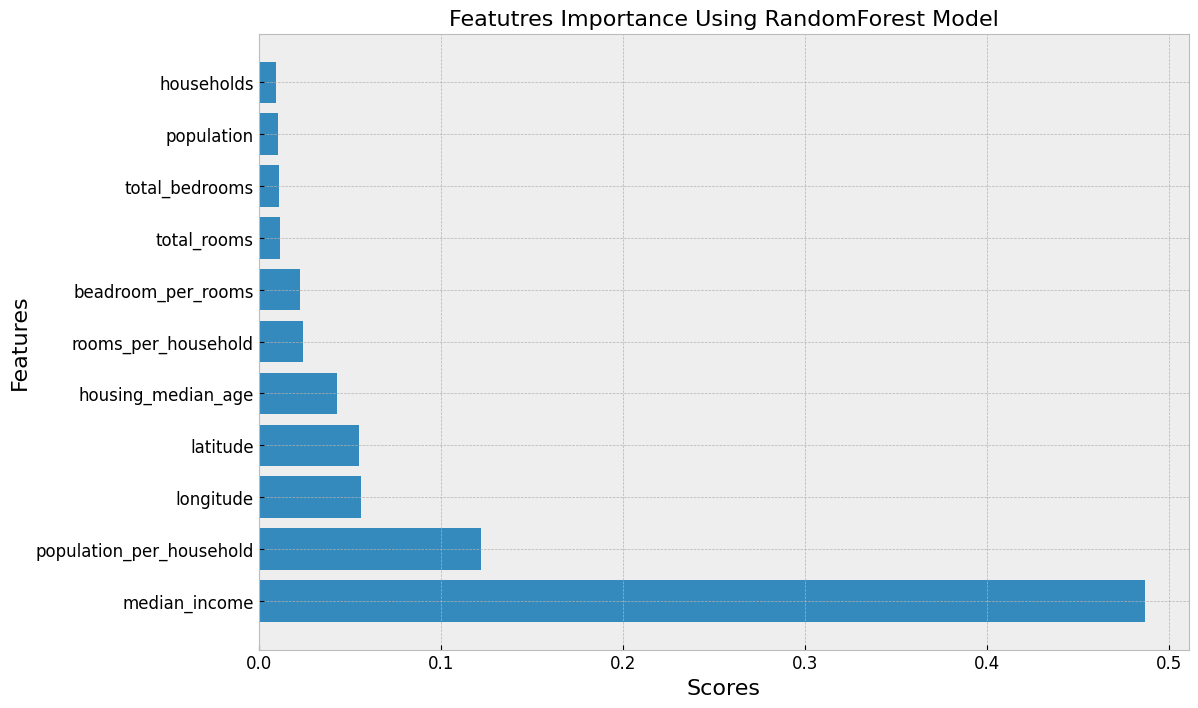

In [103]:
## to DF and then plotting
df_feat_import_forest = pd.DataFrame({'Features': keys_forest, 'Scores': values_forest})
df_feat_import_forest = df_feat_import_forest.sort_values(by='Scores', ascending=False)

## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_forest['Features'], width=df_feat_import_forest['Scores'])
plt.title('Featutres Importance Using RandomForest Model', fontsize=16, c='k')
plt.xlabel('Scores', fontsize=16, c='k')
plt.ylabel('Features', fontsize=16, c='k')
plt.xticks(c='k', fontsize=12)
plt.yticks(c='k', fontsize=12)
plt.grid('on')
plt.show()

### 8. `XGBoost`

In [104]:
#using the hero api ---  xgbpboost
xgb_reg=XGBRegressor(n_estimator=100,max_depth=6,learning_reatr=0.1,subsample=0.8)

In [105]:
xgb_reg.fit(x_train_final,y_train)

[05:52:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "learning_reatr", "n_estimator" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None,
             learning_reatr=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimator=100, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [106]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_xgb = cross_val_score(estimator=xgb_reg, X=x_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_xgb = -1 * rmse_scores_xgb   ## we want it positive
rmse_scores_xgb = np.sqrt(rmse_scores_xgb)
print(f'RMSE Scores Using Tuned XGBoost --- {np.round(rmse_scores_xgb, 4)}')
print(f'Mean of RMSE Scores Using XGBoost --- {rmse_scores_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_xgb = cross_val_predict(estimator=xgb_reg, X=x_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
print(f'RMSE after prediction Using XGBoost --- {rmse_pred_xgb:.4f}')  ## almost the same result :D

RMSE Scores Using Tuned XGBoost --- [46497.2083 47432.746  49822.795  47792.4553 47943.6958]
Mean of RMSE Scores Using XGBoost --- 47897.7801
************************************************************************************************************************
RMSE after prediction Using XGBoost --- 47910.0877


### `Tuning XGBoost`

In [107]:
params_best_xgb = {'n_estimators': np.arange(100, 200, 50), 'max_depth': np.arange(4, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.8, 0.9]}
grid_xgp=GridSearchCV(estimator=xgb_reg,param_grid=params_best_xgb,cv=5,
                      scoring='neg_mean_squared_error',n_jobs=-1,verbose=6)
grid_xgp.fit(x_train_final,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[05:58:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "learning_reatr", "n_estimator" } are not used.



GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, l...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimator=100,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([ 4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([100, 150]),
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error', verbose=6)

In [108]:
# Get the best params
best_xgb_params=grid_xgp.best_params_
print('best_xgb_params -- ', best_xgb_params)

best_xgb=grid_xgp.best_estimator_ ## predict using this Model
print('best_xgb -- ', best_xgb)

best_xgb_params --  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8}
best_xgb --  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1,
             learning_reatr=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimator=100, n_estimators=150,
             n_jobs=None, num_parallel_tree=None, ...)


In [109]:
### Finally

## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_tuned_xgb = cross_val_score(estimator=best_xgb, X=x_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb   ## we want it positive
rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_tuned_xgb = cross_val_predict(estimator=best_xgb, X=x_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_tuned_xgb = np.sqrt(mean_squared_error(y_train, y_pred_tuned_xgb))
print(f'RMSE after prediction Using Tuned XGBoost --- {rmse_pred_tuned_xgb:.4f}')  ## almost the same result :D

RMSE Scores Using Tuned Tuned XGBoost --- [44577.0097 46753.8341 46620.9049 45085.3031 46345.7689]
Mean of RMSE Scores Using Tuned XGBoost --- 45876.5642
************************************************************************************************************************
RMSE after prediction Using Tuned XGBoost --- 45884.9481


### `Feature Importance using XGBoost`

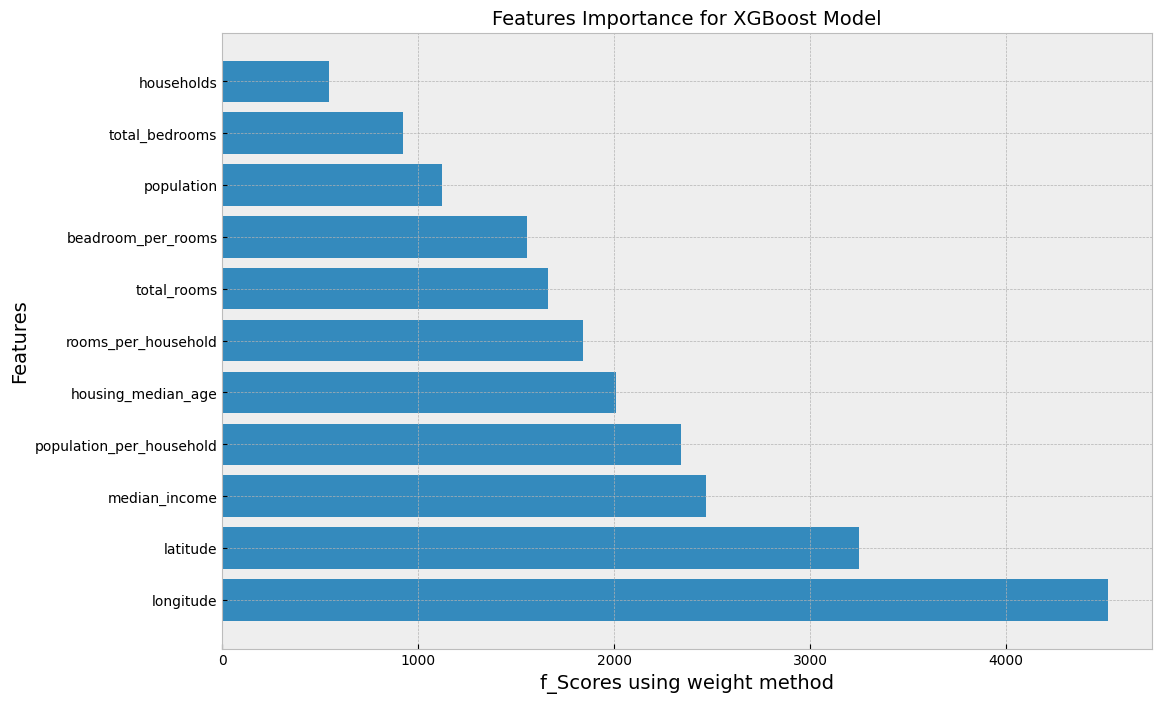

In [110]:
## Using XGBoost to get the Feature Importance
## get and sort 
feat_import_xgb = best_xgb.get_booster().get_score(importance_type='weight')  ## the same as RF, but RF normalize
df_feat_import_xgb = pd.DataFrame.from_dict(feat_import_xgb, orient='index')   ## to DF
df_feat_import_xgb = df_feat_import_xgb.reset_index()
df_feat_import_xgb = df_feat_import_xgb.rename(columns={'index': 'Features', 0:'f_scores'})  ## Some Modification

## Only taking the first 11 Numerical Cols 
df_feat_import_xgb = df_feat_import_xgb[:11]   ## take only the first 11 Numerical Cols

# ## Some Sort to plot
df_feat_import_xgb['Features'] = num_cols
df_feat_import_xgb = df_feat_import_xgb.sort_values(by='f_scores', ascending=False)


## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_xgb['Features'], width=df_feat_import_xgb['f_scores'])
plt.title('Features Importance for XGBoost Model', fontsize=14, c='k')
plt.xlabel('f_Scores using weight method', fontsize=14, c='k')
plt.xticks(c='k')
plt.yticks(c='k')
plt.ylabel('Features', fontsize=14, c='k')
plt.show()

### `VotingRegressor`

In [111]:
## Voting
voting_reg = VotingRegressor(estimators=[
                                        ('tuned_forest', best_forest), 
                                        ('tuned_xgb', best_xgb)
                                        ]
                            )

voting_reg.fit(x_train_final, y_train)  ## train

[05:59:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "learning_reatr", "n_estimator" } are not used.



VotingRegressor(estimators=[('tuned_forest',
                             RandomForestRegressor(max_depth=16,
                                                   max_samples=0.9,
                                                   n_estimators=450, n_jobs=-1,
                                                   random_state=42)),
                            ('tuned_xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feat...
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, learning_reatr=0.1,
                                          max_bin=None, max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=8,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimator=100, n_estimators=150,
                                          n_jobs=None, num_parallel_tree=None, ...))])

In [112]:
### Finally

## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_voting = cross_val_score(estimator=voting_reg, X=x_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_voting = -1 * rmse_scores_voting   ## we want it positive
rmse_scores_voting = np.sqrt(rmse_scores_voting)
print(f'RMSE Scores Using VotingRegressor --- {np.round(rmse_scores_voting, 4)}')
print(f'Mean of RMSE Scores Using VotingRegressor --- {rmse_scores_voting.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_voting = cross_val_predict(estimator=voting_reg, X=x_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_voting = np.sqrt(mean_squared_error(y_train, y_pred_voting))
print(f'RMSE after prediction Using VotingRegressor --- {rmse_pred_voting:.4f}')  ## almost the same result :D

RMSE Scores Using VotingRegressor --- [45740.7515 48714.8624 48005.7567 46130.6129 47416.959 ]
Mean of RMSE Scores Using VotingRegressor --- 47201.7885
************************************************************************************************************************
RMSE after prediction Using VotingRegressor --- 47215.0460


### `Download the best Model --- best_xgb`

In [113]:
import joblib
#download
joblib.dump(best_xgb,'model_xgboost.pkl')

['model_xgboost.pkl']

In [114]:
## to load this pretrained Model
loaded_model = joblib.load('model_XGBoost.pkl')
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1,
             learning_reatr=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimator=100, n_estimators=150,
             n_jobs=None, num_parallel_tree=None, ...)

In [115]:
## Now, we can touch Test Dataset using (loaded_model == best_xgb) -- tuned XGBoost Model
y_pred_test = loaded_model.predict(x_test_final)  ## Remember X_test_final --> is processed and ready (take care)

## RMSE on test after finishing all my work
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'RMSE on test Dataset using XGBoost -- {rmse_test:.3f}')   ## Very Good :D

RMSE on test Dataset using XGBoost -- 44644.603
